In [ ]:
with open("/content/drive/MyDrive/Project/task2/injury45.txt", "rt") as f: 
    data = f.readlines()

    # 전체 데이터 한줄씩 불러오기
    for i in data:
        print(i)

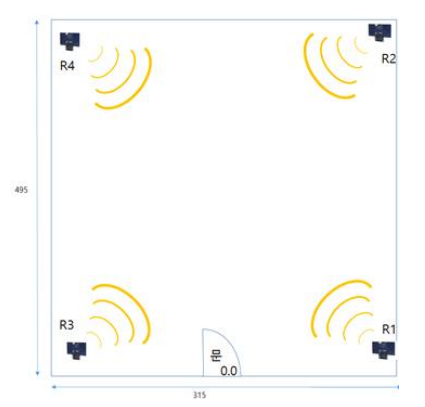

In [ ]:
with open("/content/drive/MyDrive/Project/task2/injury45.txt", "rt") as f: 
    data = f.readlines()

    # 레이더 1~4 값만 추출하기
    for i in range(len(data)):
        radar = data[i].strip().split(',')
        print(radar[2:6])

data_1/248:  ['3.6225', '3.4632', '0.0', '1.6845']


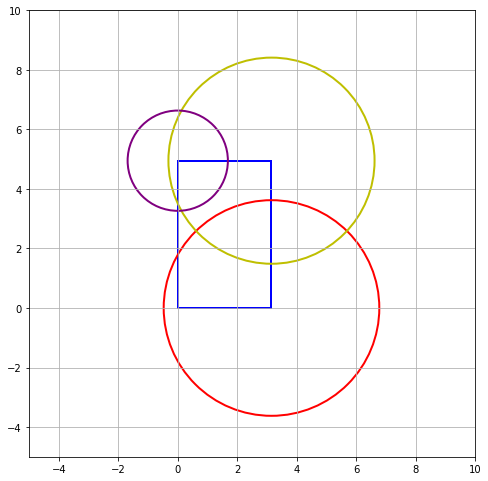

data_2/248:  ['3.6398', '3.4592', '0.0', '1.6828']


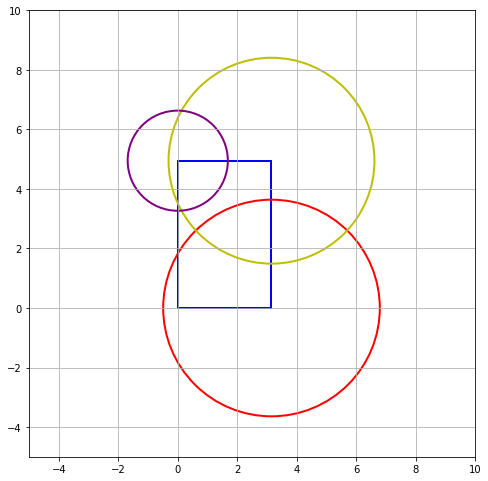

In [4]:
# matplotlib을 이용해서 레이더 범위 시각화하기

from matplotlib import pyplot as plt     
import matplotlib.patches as patches          
import time


with open("/content/drive/MyDrive/Project/task2/injury45.txt", "rt") as f: 
    data = f.readlines()
    pause_time = 0.001
    
    li = []

    # 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
    circle_center1 = (3.15, 0)
    circle_center2 = (3.15, 4.95)
    circle_center3 = (0, 0)
    circle_center4 = (0, 4.95)

    # 각 행마다 1~4 레이더값(거리) 출력 -> 원의 반지름
    # for i in range(len(data)):
    for i in range(2):
        radar = data[i].strip().split(',')
        radar = radar[2:6]
        li.append(radar)
        # print(li[i])
        # print(type(li[i][0])) # str형식으로 출력됨.
        circle_radius1 = float(li[i][0]) # float 형식으로 변환하기
        # print(type(circle_radius1))
        circle_radius2 = float(li[i][1]) 
        circle_radius3 = float(li[i][2])
        circle_radius4 = float(li[i][3])

        # print(circle_radius1)
        
        # 격자그리기
        a = plt.axes(xlim=(-5, 10), ylim=(-5, 10))

        
        # 사각형(방) 그리기
        a.add_patch(patches.Rectangle((0,0), 3.15, 4.95, edgecolor = 'blue', fill = False, linewidth = 2))

        # 원 그리기
        c1 = plt.Circle(circle_center1, circle_radius1, ec = 'r', fill = False, lw = 2)
        c2 = plt.Circle(circle_center2, circle_radius2, ec = 'y', fill = False, lw = 2)
        c3 = plt.Circle(circle_center3, circle_radius3, ec = 'g', fill = False, lw = 2)
        c4 = plt.Circle(circle_center4, circle_radius4, ec = 'purple', fill = False, lw = 2)
    
        # 격자에 원 추가하기
        a.add_patch(c1)
        a.add_patch(c2)
        a.add_patch(c3)
        a.add_patch(c4)
        a.set_aspect('equal')


        print("data_{}/{}: ".format(i+1, len(data)), li[i])
        plt.rcParams["figure.figsize"] = (8, 10)
        plt.grid(True)
        plt.show()
        time.sleep(pause_time)


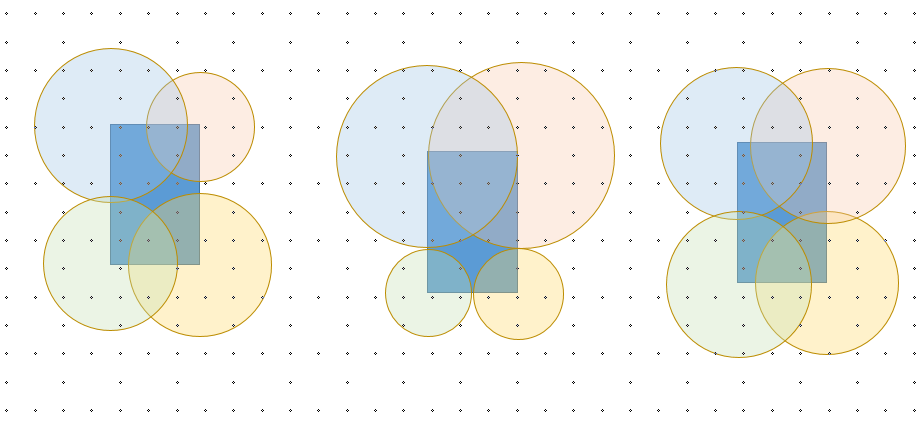
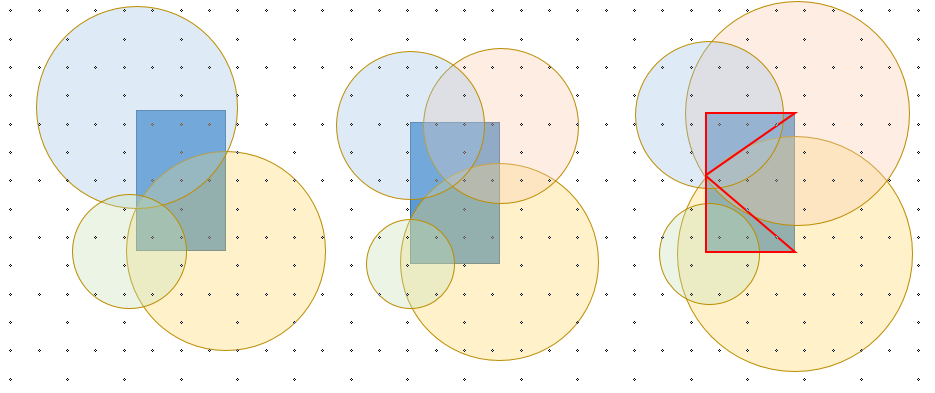

In [7]:
# 객체 면적구하는 식 만들기

import math

def circle_area(r): # 원의 면적 구하기
    return (r**2) * 3.14


def theta(R, r, d): # 부채꼴의 내각구하기
    try:
        if abs(R - r) < d < R +r and R !=0 and r !=0:
            return 2 * math.acos((pow(d, 2) + pow(R, 2) - pow(r, 2)) / (2 * R * d))
        elif R + r <= d: # 두 원이 외부에서 겹치지 않는 경우
            return 0
        elif min(R, r) <= math.sqrt(pow(max(R, r),2) - pow(d, 2)): # 한 원의 부채꼴이 다른 원안에 포함되는 경우
            return 0
        elif R == 0 or r == 0 : # 레이더값이 존재하지 않는 경우
            return 0
    except ZeroDivisionError:
        return 0


def intersection_area(R, r, d): # 부채꼴의 내각을 이용해서 교차면적 구하기
    t1 = theta(R, r, d)
    t2 = theta(r, R, d)
    return ((pow(R, 2) * (t1 - math.sin(t1)) + pow(r, 2) * (t2 - math.sin(t2))) / 2) / 2 # 교차면적은 1/2해줘야함.


def excess_area(R, d, diagonal_l, room_a): # 초과면적 구하기
    if R > d: # 반지름의 길이가 방길이를 초과하는 경우 초과면적이 발생함
        return ((pow(R, 2) * math.acos(d / R)) - ((math.sqrt(pow(R, 2) - pow(d, 2)) * d))) / 2
    elif  R >= diagonal_l: # 반지름의 길이가 대각선의 길이보다 큰 경우 초과면적은 부채꼴의 넓이 - 방넓이
        return ((R**2) * 3.14 / 4) - room_a 
    else:
        return 0


def circular_sector(R, r, d): # 사각형 내의 부채꼴의 면적 구하기(원의 넓이/4)
    if pow(R,2) >= math.sqrt(pow(r, 2) + pow(d, 2)): # 첫번째 원이 두번째 원을 잡아먹는 경우 첫번째 원 부채꼴의 크기 구하기
        return (R**2) * 3.14 / 4
    elif pow(r,2) >= math.sqrt(pow(R, 2) + pow(d, 2)): # 두번째 원이 첫번째 원을 잡아먹는 경우 첫번째 원의 값 0 처리하기
        return 0
    else: 
        return (R**2) * 3.14 / 4 


def target_section(room_a, circular_s, intersection_a, excess_a): # 최종 객체면적: 방면적 - 원넓이/4(부채꼴의 넓이) + 교차면적 + 초과면적
    return room_a - circular_s + intersection_a + excess_a 

In [8]:
# 객체 면적구하기

from matplotlib import pyplot as plt     
import matplotlib.patches as patches        
import time


with open("/content/drive/MyDrive/Project/task2/injury45.txt", "rt") as f: 
    data = f.readlines()
    pause_time = 0.001
    
    li = []

    file_name = "injury45" # 파일이름 바꿔주기

    # 가로: 3.15m, 세로: 4.95m/ 각각의 레이더 좌표(원의 중심점) 입력
    circle_center1 = (3.15, 0)
    circle_center2 = (3.15, 4.95)
    circle_center3 = (0, 0)
    circle_center4 = (0, 4.95)

    # 방의 넓이
    w = 3.15
    h = 4.95

    room_area = w * h
    diagonal_line = math.sqrt(pow(w, 2) + pow(h, 2))

    # 각 행마다 1~4 레이더값(거리) 출력 -> 원의 반지름
    for i in range(2):
        radar = data[i].strip().split(',')
        radar = radar[2:6]
        li.append(radar)
        # print(li[i])
        # print(type(li[i][0])) # str형식으로 출력됨.
        circle_radius1 = float(li[i][0]) # float 형식으로 변환하기
        # print(type(circle_radius1))
        circle_radius2 = float(li[i][1]) 
        circle_radius3 = float(li[i][2])
        circle_radius4 = float(li[i][3])

        # 겹치는 두 원의 교차면적
        intersection_area1_2 = intersection_area(circle_radius1, circle_radius2, h)
        intersection_area2_4 = intersection_area(circle_radius2, circle_radius4, w)
        intersection_area4_3 = intersection_area(circle_radius4, circle_radius3, h)
        intersection_area3_1 = intersection_area(circle_radius3, circle_radius1, w)
        total_intersection_area = intersection_area1_2 + intersection_area2_4 + intersection_area4_3 + intersection_area3_1
        print("intersection_area: ", intersection_area1_2)

        # 각 원의 초과면적
        excess_area1_2 = excess_area(circle_radius1, w, diagonal_line, room_area)
        excess_area2_4 = excess_area(circle_radius2, w, diagonal_line, room_area)
        excess_area4_3 = excess_area(circle_radius4, w, diagonal_line, room_area)
        excess_area3_1 = excess_area(circle_radius3, w, diagonal_line, room_area)
        total_excess_area = excess_area1_2 + excess_area2_4 + excess_area4_3 + excess_area3_1
        print("total_excess_area: ", total_excess_area)

        # 부채꼴의 넓이
        circular_sector1 = circular_sector(circle_radius1, circle_radius2, h)
        circular_sector2 = circular_sector(circle_radius2, circle_radius4, w)
        circular_sector4 = circular_sector(circle_radius4, circle_radius3, h)
        circular_sector3 = circular_sector(circle_radius3, circle_radius1, w)
        total_circular_sector = circular_sector1 + circular_sector2 + circular_sector3 + circular_sector4
        print("total_circular_sector: ", total_circular_sector)

        # 최종 객체면적
        Final_target_section = target_section(room_area, total_circular_sector, total_intersection_area, total_excess_area)

        print(file_name + "의 {}번째 객체면적은 : ".format(i+1), Final_target_section)
        print()

intersection_area:  3.7328988198634074
total_excess_area:  0.8746049966131024
total_circular_sector:  21.943733580900002
injury45의 1번째 객체면적은 :  0.7736632388891151

intersection_area:  3.7701227834969484
total_excess_area:  0.9013957824924983
total_circular_sector:  22.016129248200002
injury45의 2번째 객체면적은 :  0.7539837933254452

